In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("Laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [4]:
# Droping Unnamed variable
df.drop("Unnamed: 0", inplace = True, axis = 1)

In [5]:
# Checking the missing values
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
# Checking the duplicated values
df.duplicated().sum()

29

In [7]:
# Describing the object datatype
df.describe(include = "object")

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
count,1303,1303,1303,1303,1303,1303,1303,1303,1303
unique,19,6,40,118,9,39,110,9,179
top,Dell,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg
freq,297,727,507,190,619,412,281,1072,121


In [8]:
# Descibing continuous variable
df.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


***Price Variable***

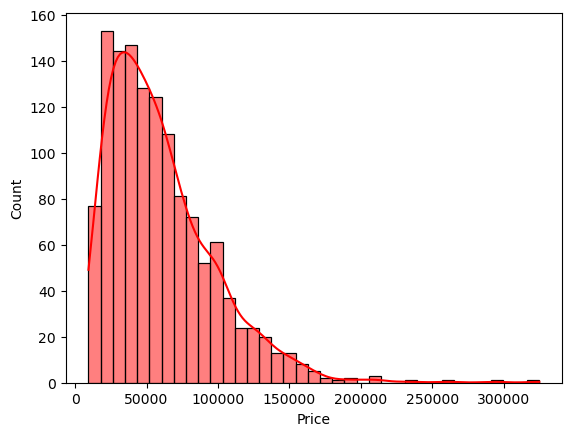

In [9]:
sns.histplot(df["Price"], kde = True, color = "red")
plt.show()

***Company Variable***

In [10]:
df["Company"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

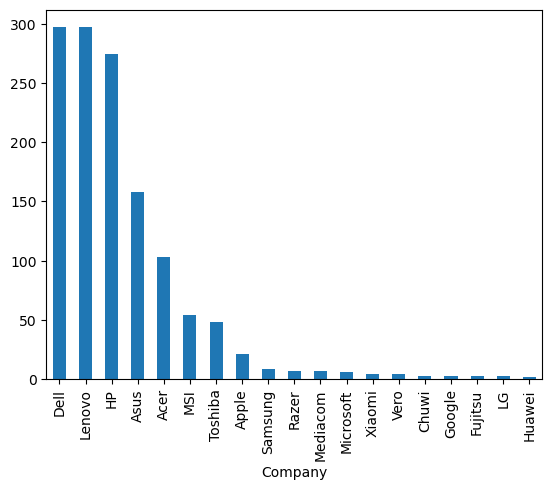

In [11]:
df["Company"].value_counts().plot(kind = "bar")
plt.show()

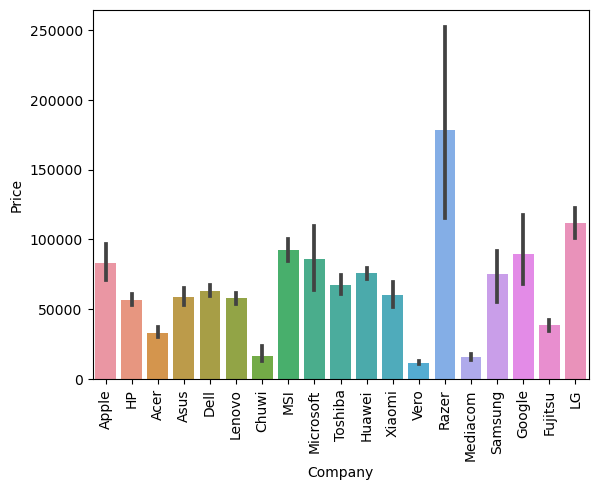

In [12]:
sns.barplot(x = df["Company"], y = df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

***TypeName***

In [13]:
df["TypeName"].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

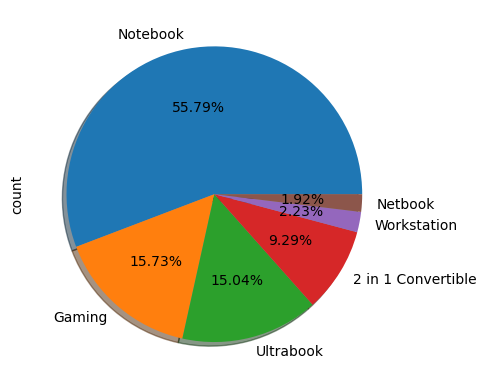

In [14]:
df["TypeName"].value_counts().plot(kind = "pie", autopct = "%0.02f%%", shadow = True)
plt.show()

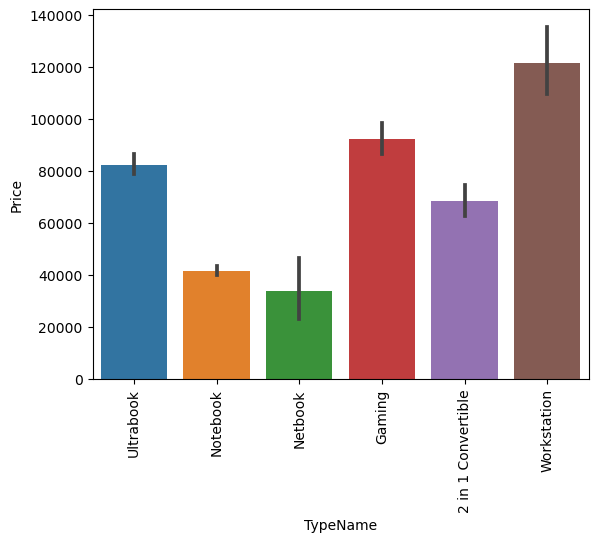

In [15]:
sns.barplot(x = df["TypeName"], y = df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

***ScreenResolution***

In [16]:
df["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [17]:
# Seperating the pixel into x and y
df["XY"] = df["ScreenResolution"].str.split(" ").apply(lambda x : x[-1])
df["x_pixel"] = df["XY"].str.split("x").apply(lambda x : x[0]).astype(int)
df["y_pixel"] = df["XY"].str.split("x").apply(lambda x : x[1]).astype(int)
df.drop("XY", axis = 1, inplace = True)

In [18]:
df["ppi"] = (((df["x_pixel"]**2 + df["y_pixel"]**2))**0.5/df["Inches"]).astype("float")

In [19]:
# Seperating the IPS Panel, TouchScreen and Full HD 
df["IPS"] = df["ScreenResolution"].apply(lambda x : 1 if "IPS Panel" in x else 0)
df["TouchScreen"] = df["ScreenResolution"].apply(lambda x : 1 if "Touchscreen" in x else 0)
df["FullHD"] = df["ScreenResolution"].apply(lambda x : 1 if "Full HD" in x else 0)

# Dropping ScreenResolution variable
df.drop(["ScreenResolution", "x_pixel", "y_pixel"], axis = 1, inplace = True)

In [20]:
for i in ["IPS", "TouchScreen", "FullHD"]:
    print(df[i].value_counts())
    print("---------------------------")

IPS
0    938
1    365
Name: count, dtype: int64
---------------------------
TouchScreen
0    1111
1     192
Name: count, dtype: int64
---------------------------
FullHD
1    843
0    460
Name: count, dtype: int64
---------------------------


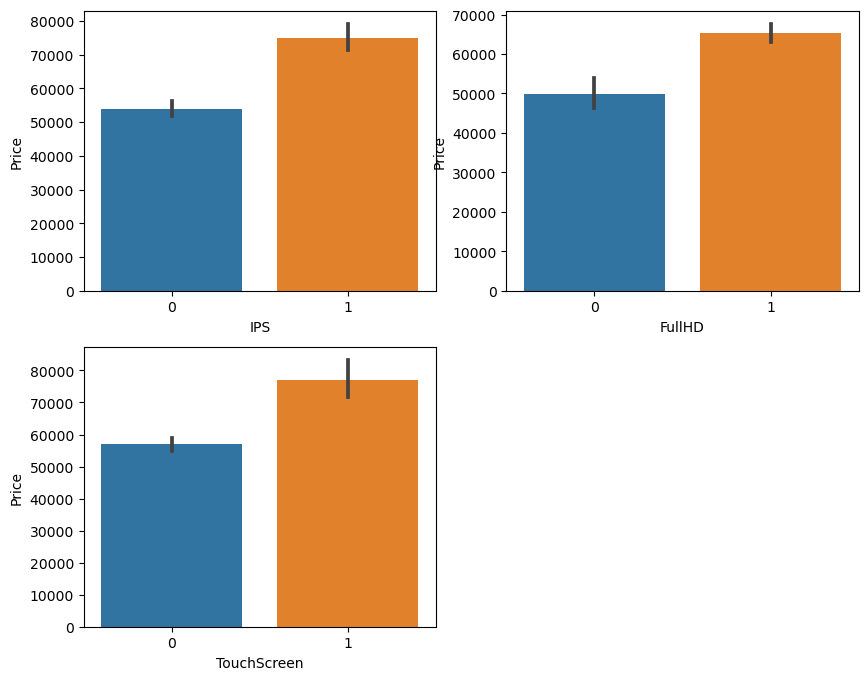

In [21]:
plt.figure(figsize = (10, 8))

plt.subplot(2, 2, 1)
sns.barplot(x = df["IPS"], y = df["Price"])

plt.subplot(2, 2, 2)
sns.barplot(x = df["FullHD"], y = df["Price"])

plt.subplot(2, 2, 3)
sns.barplot(x = df["TouchScreen"], y = df["Price"])
plt.show()

***CPU***

In [22]:
df["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [23]:
df["CPU_name"] = df["Cpu"].apply(lambda x : " ".join(x.split()[0:3]))

In [24]:
def processor(text):
    if text == "Intel Core i3" or text == "Intel Core i5" or text == "Intel Core i7":
        return text
    elif text.split()[0] == "Intel":
        return "Intel Other Processor"
    else:
        return "AMD Processor"

In [25]:
df["CPU_processor"] = df["CPU_name"].apply(processor)
df["Ghz"] = df["Cpu"].str.replace("GHz","").str.split().apply(lambda x : x[-1])

In [26]:
# Drop Cpu and CPU_name 
df.drop(columns = ["Cpu", "CPU_name"], inplace = True)

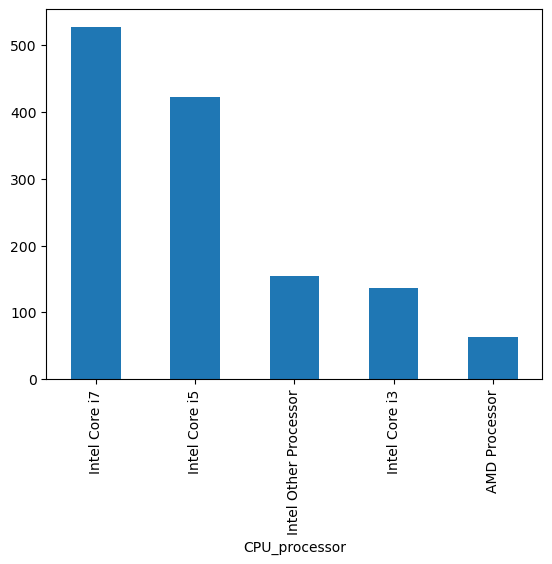

In [27]:
df["CPU_processor"].value_counts().plot(kind = "bar")
plt.show()

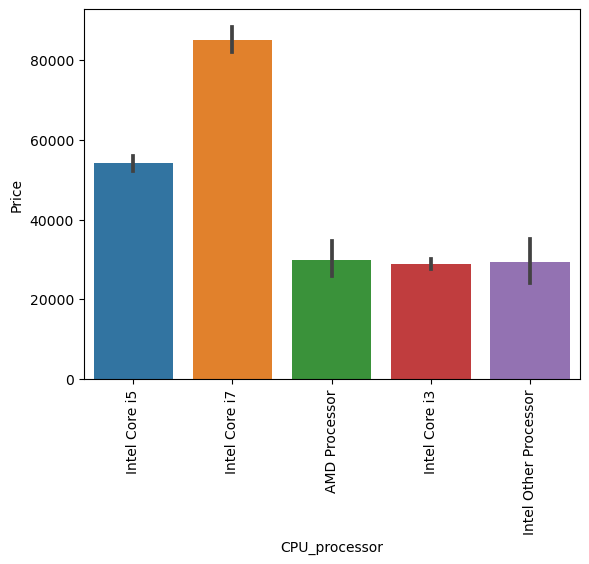

In [28]:
sns.barplot(x = df["CPU_processor"], y = df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

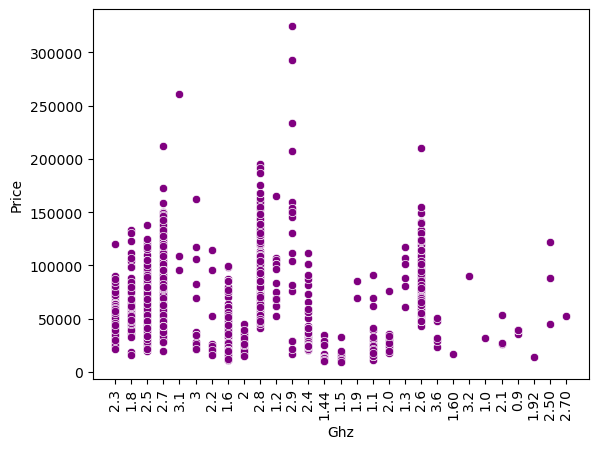

In [29]:
sns.scatterplot(x = df["Ghz"], y = df["Price"], color = "purple")
plt.xticks(rotation = "vertical")
plt.show()

***Ram***

In [30]:
df["Ram"].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [31]:
df["Ram"] = df["Ram"].str.replace("GB", "")

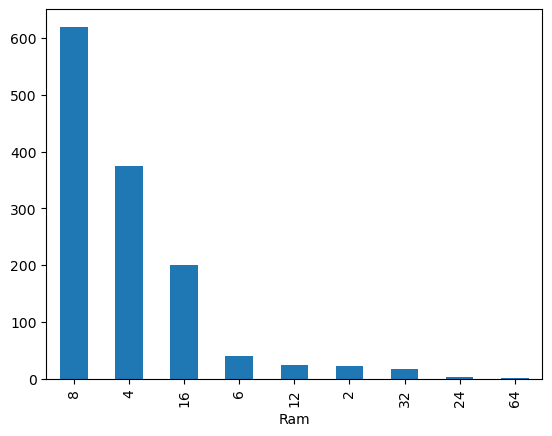

In [32]:
df["Ram"].value_counts().plot(kind = "bar")
plt.show()

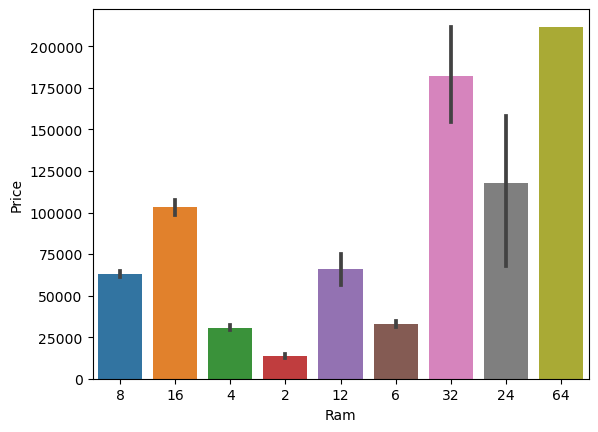

In [33]:
sns.barplot(x = df["Ram"], y = df["Price"])
plt.show()

***Memory***

In [34]:
df["Memory"].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [35]:
df["Memory"] = df["Memory"].str.replace(".0", "")
df["Memory"] = df["Memory"].str.replace("GB", "")
df["Memory"] = df["Memory"].str.replace("TB", "000")

In [36]:
new_memory = df["Memory"].str.split("+", n = 1, expand = True)
df["first"] = new_memory[0]
df["second"] = new_memory[1]

In [37]:
df["second"] = df["second"].fillna("0")

In [38]:
df["first_ssd"] = df["first"].apply(lambda x : 1 if "SSD" in x else 0)
df["first_hdd"] = df["first"].apply(lambda x : 1 if "HDD" in x else 0)
df["first_flash"] = df["first"].apply(lambda x : 1 if "Flash" in x else 0)
df["first_hybrid"] = df["first"].apply(lambda x : 1 if "Hybrid" in x else 0)

df["second_ssd"] = df["second"].apply(lambda x : 1 if "SSD" in x else 0)
df["second_hdd"] = df["second"].apply(lambda x : 1 if "HDD" in x else 0)
df["second_flash"] = df["second"].apply(lambda x : 1 if "Flash" in x else 0)
df["second_hybrid"] = df["second"].apply(lambda x : 1 if "Hybrid" in x else 0)

In [39]:
df["first"] = df["first"].str.strip()
df["second"] = df["second"].str.strip()

In [40]:
df["first"] = df["first"].str.split().apply(lambda x : x[0]).astype(int)
df["second"] = df["second"].str.split().apply(lambda x : x[0]).astype(int)

In [41]:
df["SSD"] = (df["first"]*df["first_ssd"]) + (df["second"]* df["second_ssd"])
df["HDD"] = (df["first"]*df["first_hdd"]) + (df["second"]* df["second_hdd"])
df["Flash"] = (df["first"]*df["first_flash"]) + (df["second"]* df["second_flash"])
df["Hybrid"] = (df["first"]*df["first_hybrid"]) + (df["second"]* df["second_hybrid"])

In [42]:
df.drop(columns = ["Memory", "first", "second", "first_ssd", "first_hdd", "first_flash", 
                   "first_hybrid", "second_ssd", "second_hdd", "second_flash", "second_hybrid"], inplace = True)

In [43]:
for i in ["SSD", "HDD", "Flash", "Hybrid"]:
    print(df[i].value_counts())
    print("--------------------------------")

SSD
256     498
0       460
128     172
512     138
1000     16
32        6
180       5
16        3
64        1
1024      1
768       1
240       1
8         1
Name: count, dtype: int64
--------------------------------
HDD
0       727
1000    408
500     134
2000     32
32        1
128       1
Name: count, dtype: int64
--------------------------------
Flash
0      1228
32       38
64       16
256       8
16        7
128       4
512       2
Name: count, dtype: int64
--------------------------------
Hybrid
0       1291
1000      11
508        1
Name: count, dtype: int64
--------------------------------


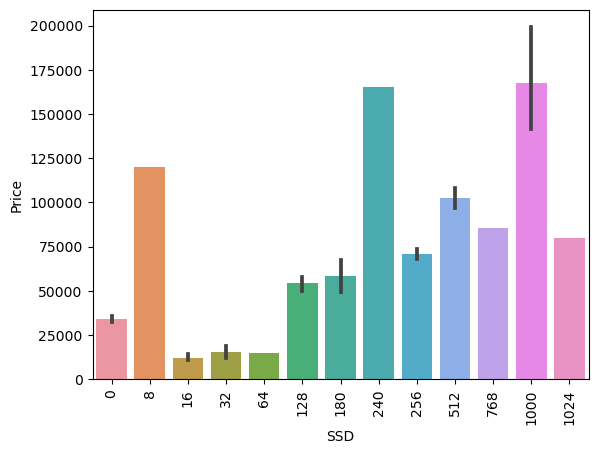

In [44]:
sns.barplot(x = df["SSD"], y = df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

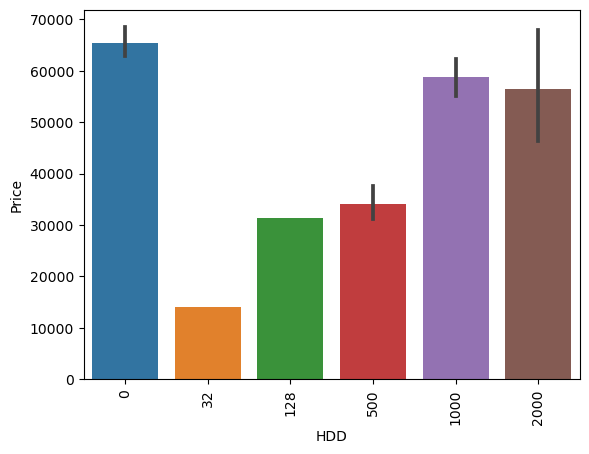

In [45]:
sns.barplot(x = df["HDD"], y = df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

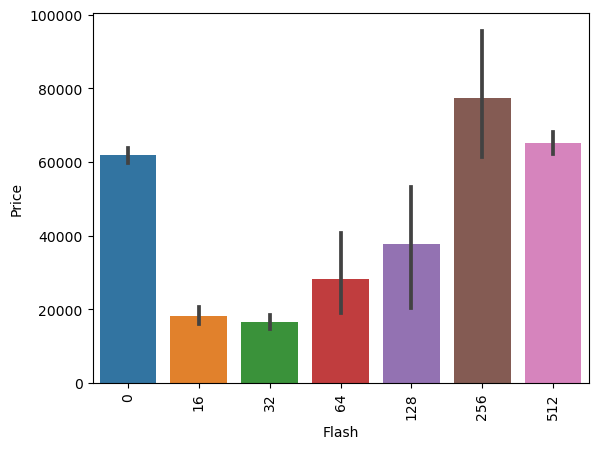

In [46]:
sns.barplot(x = df["Flash"], y = df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

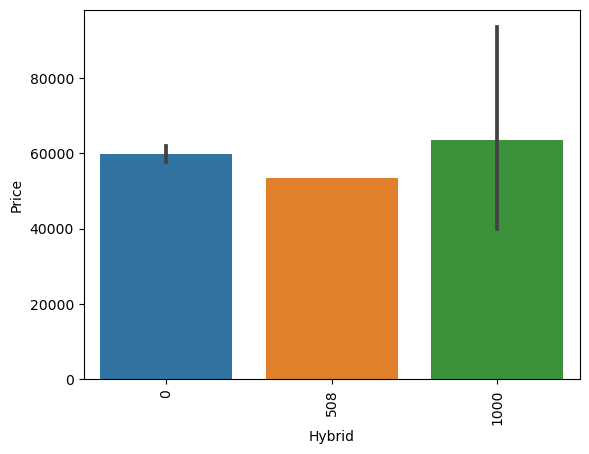

In [47]:
sns.barplot(x = df["Hybrid"], y = df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

***Gpu***

In [48]:
df["Gpu"].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [49]:
df["GPU"] = df["Gpu"].str.split().apply(lambda x : x[0])
df.drop("Gpu", axis = 1, inplace = True)

In [50]:
df.drop(index = [1191], inplace = True)

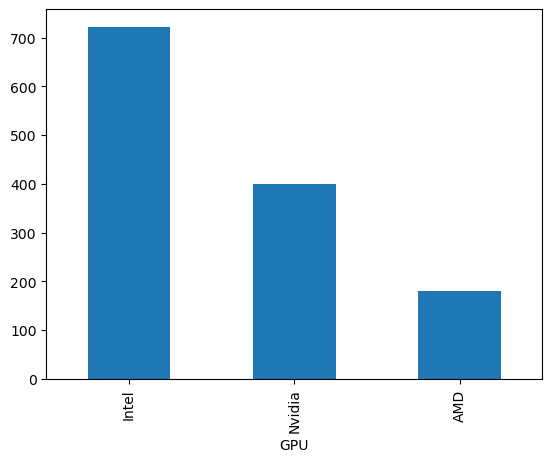

In [51]:
df["GPU"].value_counts().plot(kind = "bar")
plt.show()

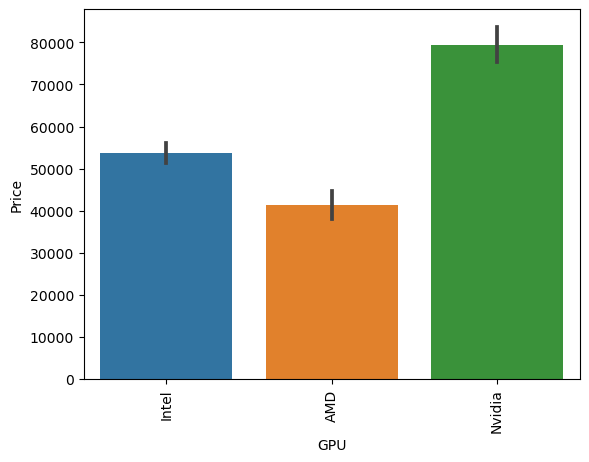

In [52]:
sns.barplot(x = df["GPU"], y = df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

***OpSys***

In [53]:
df["OpSys"].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [54]:
def os_system(text):
    if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
        return "Windows"
    elif text == 'macOS' or text == 'Mac OS X':
        return "MAC"
    else:
        return "Others"

In [55]:
df["OpSys"] = df["OpSys"].apply(os_system)

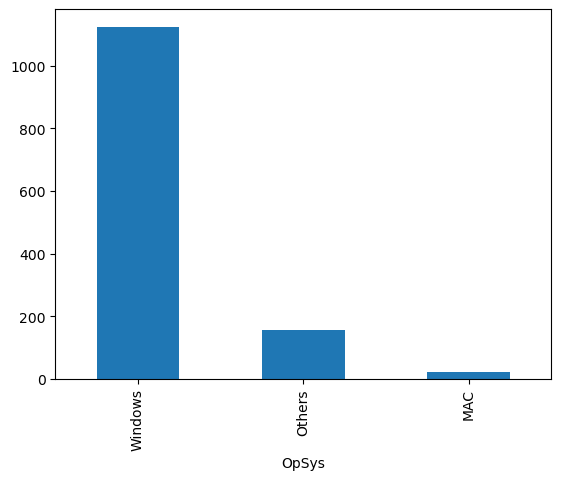

In [56]:
df["OpSys"].value_counts().plot(kind = "bar")
plt.show()

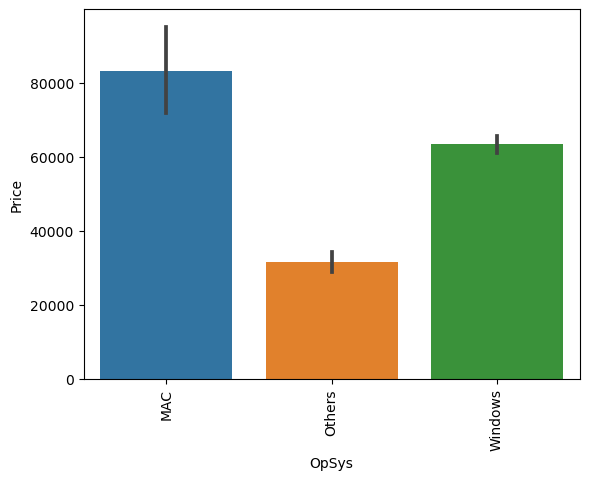

In [57]:
sns.barplot(x = df["OpSys"], y = df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

***Weight***

In [58]:
df["Weight"].value_counts()

Weight
2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
         ... 
1.59kg      1
4.7kg       1
1.55kg      1
1.18kg      1
4.0kg       1
Name: count, Length: 179, dtype: int64

In [59]:
df["Weight"] = df["Weight"].str.replace("kg", "")

***Inches***

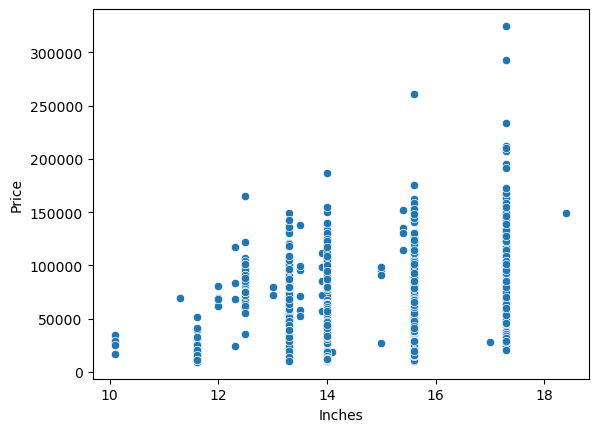

In [60]:
sns.scatterplot(x = df["Inches"], y = df["Price"])
plt.show()

In [61]:
df.head(2)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,ppi,IPS,TouchScreen,FullHD,CPU_processor,Ghz,SSD,HDD,Flash,Hybrid,GPU
0,Apple,Ultrabook,13.3,8,MAC,1.37,71378.6832,226.983005,1,0,0,Intel Core i5,2.3,128,0,0,0,Intel
1,Apple,Ultrabook,13.3,8,MAC,1.34,47895.5232,127.677940,0,0,0,Intel Core i5,1.8,0,0,128,0,Intel


In [62]:
df.dtypes

Company           object
TypeName          object
Inches           float64
Ram               object
OpSys             object
Weight            object
Price            float64
ppi              float64
IPS                int64
TouchScreen        int64
FullHD             int64
CPU_processor     object
Ghz               object
SSD                int64
HDD                int64
Flash              int64
Hybrid             int64
GPU               object
dtype: object

In [63]:
# Converting the datatypes
df["Weight"] = df["Weight"].astype(float)
df["Ram"] = df["Ram"].astype(int)
df["Ghz"] = df["Ghz"].astype(float)

In [64]:
continuous = ['Inches','Weight', 'Price','ppi', 'Ram', 'IPS', 'TouchScreen', 'FullHD','Ghz', 'SSD', 'HDD', 'Flash', 'Hybrid']

# Checking the skewness
df[continuous].skew()

Inches         -0.447680
Weight          1.145635
Price           1.519750
ppi             2.031134
Ram             2.686583
IPS             0.983469
TouchScreen     1.999470
FullHD         -0.618033
Ghz            -0.833739
SSD             1.369358
HDD             0.886719
Flash          11.099211
Hybrid         10.503330
dtype: float64

In [65]:
# Checking the correlation

corr = df[continuous].corr()

<Axes: >

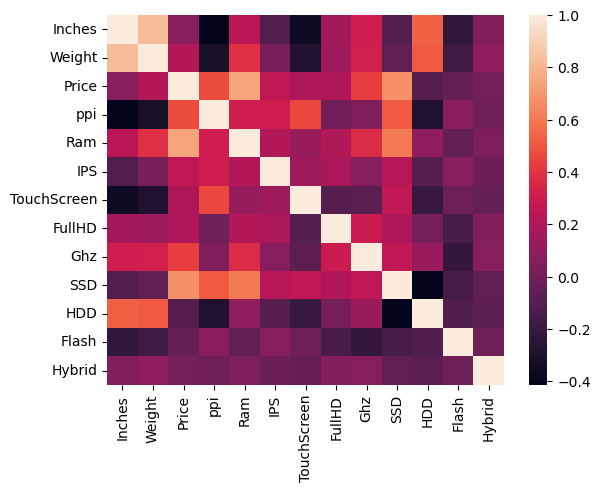

In [66]:
sns.heatmap(corr)

As Flash and Hybrid doesn't form the linear relationship. It tends towards the non-linear-relationship. So , we try to drop it.

In [67]:
df1 = df.copy()

In [68]:
df1.drop(columns = ["Flash", "Hybrid"], inplace = True)

# Data Preprocessing

***Data Cleaning***

In [69]:
continuous = ['Inches','Weight', 'Price','ppi', 'Ram', 'IPS', 'TouchScreen', 'FullHD','Ghz', 'SSD', 'HDD']

In [70]:
df1.duplicated().sum()

30

In [71]:
# Dropping duplicates
df1.drop_duplicates(inplace = True)

In [72]:
# No missing value
df1.isna().sum()

Company          0
TypeName         0
Inches           0
Ram              0
OpSys            0
Weight           0
Price            0
ppi              0
IPS              0
TouchScreen      0
FullHD           0
CPU_processor    0
Ghz              0
SSD              0
HDD              0
GPU              0
dtype: int64

***EDA***

In [73]:
df1[continuous].describe()

,Inches,Weight,Price,ppi,Ram,IPS,TouchScreen,FullHD,Ghz,SSD,HDD
count,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000
mean,15.025943,2.041761,60520.657755,146.936126,8.451258,0.279874,0.147013,0.655660,2.303774,186.298742,414.040881
std,1.428204,0.669088,37355.685811,42.940459,5.099249,0.449114,0.354258,0.475339,0.503982,186.597777,518.128204
min,10.100000,0.690000,9270.720000,90.583402,2.000000,0.000000,0.000000,0.000000,0.900000,0.000000,0.000000
25%,14.000000,1.500000,32447.520000,127.335675,4.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,15.600000,2.040000,52693.920000,141.211998,8.000000,0.000000,0.000000,1.000000,2.500000,256.000000,0.000000
75%,15.600000,2.310000,79813.440000,157.350512,8.000000,1.000000,0.000000,1.000000,2.700000,256.000000,1000.000000
max,18.400000,4.700000,324954.720000,352.465147,64.000000,1.000000,1.000000,1.000000,3.600000,1024.000000,2000.000000


In [74]:
df1.describe(include = "object")

,Company,TypeName,OpSys,CPU_processor,GPU
count,1272,1272,1272,1272,1272
unique,19,6,3,5,3
top,Dell,Notebook,Windows,Intel Core i7,Intel
freq,291,705,1099,515,702


***Feature Transformation***

In [75]:
df1[continuous].skew()

Inches        -0.440436
Weight         1.151943
Price          1.509629
ppi            2.044213
Ram            2.698195
IPS            0.981811
TouchScreen    1.995967
FullHD        -0.655976
Ghz           -0.841964
SSD            1.371340
HDD            0.892399
dtype: float64

In [76]:
# Treating the skewness
df1["Weight"] = np.log(df1["Weight"])
df1["ppi"] = np.log(df1["ppi"])
df1["SSD"] = np.log(df1["SSD"] + 1)
df1["Ram"] = np.log(df1["Ram"])
df1["Price"] = np.log(df1["Price"])

In [82]:
df1[continuous].skew()

Inches        -0.440436
Weight        -0.014133
Price         -0.178959
ppi            0.999765
Ram            0.277522
IPS            0.981811
TouchScreen    1.995967
FullHD        -0.655976
Ghz           -0.841964
SSD           -0.584535
HDD            0.892399
dtype: float64

In [83]:
df1

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,ppi,IPS,TouchScreen,FullHD,CPU_processor,Ghz,SSD,HDD,GPU
0,Apple,Ultrabook,13.3,2.079442,MAC,0.314811,11.175755,5.424875,1,0,0,Intel Core i5,2.3,4.859812,0,Intel
1,Apple,Ultrabook,13.3,2.079442,MAC,0.292670,10.776777,4.849511,0,0,0,Intel Core i5,1.8,0.000000,0,Intel
2,HP,Notebook,15.6,2.079442,Others,0.620576,10.329931,4.950262,0,0,1,Intel Core i5,2.5,5.549076,0,Intel
3,Apple,Ultrabook,15.4,2.772589,MAC,0.604316,11.814476,5.396055,1,0,0,Intel Core i7,2.7,6.240276,0,AMD
4,Apple,Ultrabook,13.3,2.079442,MAC,0.314811,11.473101,5.424875,1,0,0,Intel Core i5,3.1,5.549076,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1.386294,Windows,0.788457,10.555257,4.609707,0,0,0,Intel Core i7,2.5,0.000000,500,Nvidia
1270,Lenovo,2 in 1 Convertible,14.0,1.386294,Windows,0.587787,10.433899,5.058476,1,1,1,Intel Core i7,2.5,4.859812,0,Intel
1271,Lenovo,2 in 1 Convertible,13.3,2.772589,Windows,0.262364,11.288115,5.620595,1,1,0,Intel Core i7,2.5,6.240276,0,Intel
1272,Lenovo,Notebook,14.0,0.693147,Windows,0.405465,9.409283,4.717920,0,0,0,Intel Other Processor,1.6,0.000000,0,Intel


In [84]:
df1.to_csv("Laptop_analyzed.csv")